In [ ]:
# Step 1: Load the data
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
california = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = california.frame

# Show the first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Step 2: EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe()


Dataset shape: (20640, 9)

Column names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Data types:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


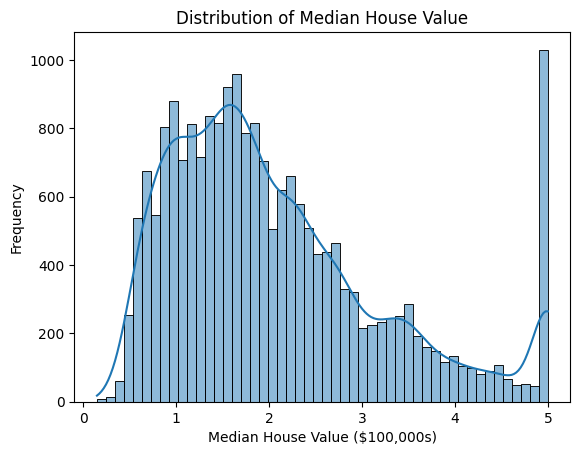

In [ ]:
# Distribution of the target (Median House Value)
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.show()


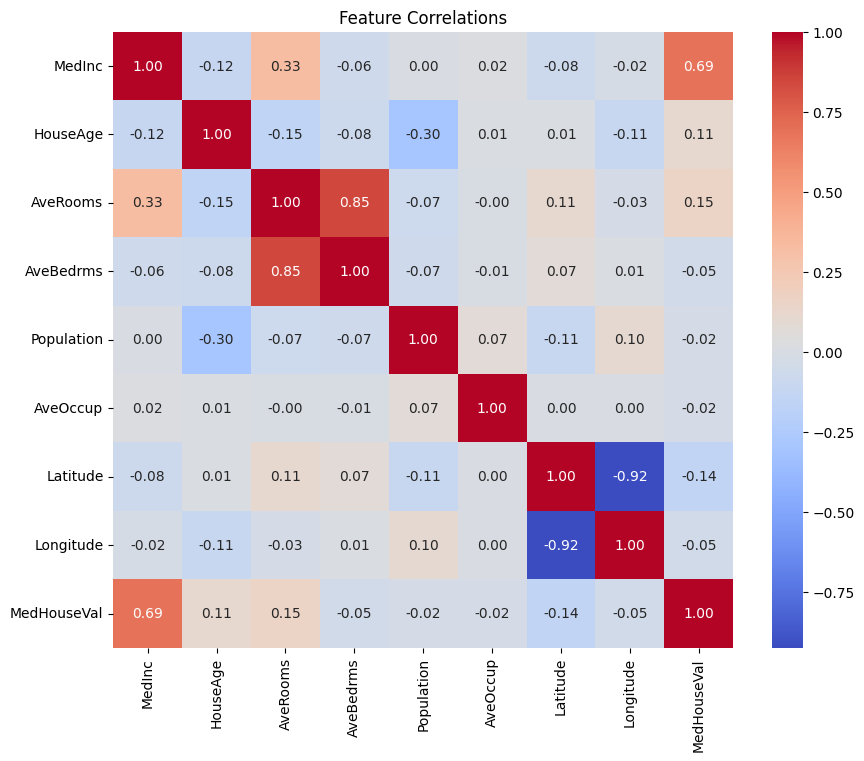

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()


In [ ]:
print("Dataset shape:", df.shape)


Dataset shape: (20640, 9)


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: xlabel='MedHouseVal', ylabel='Count'>

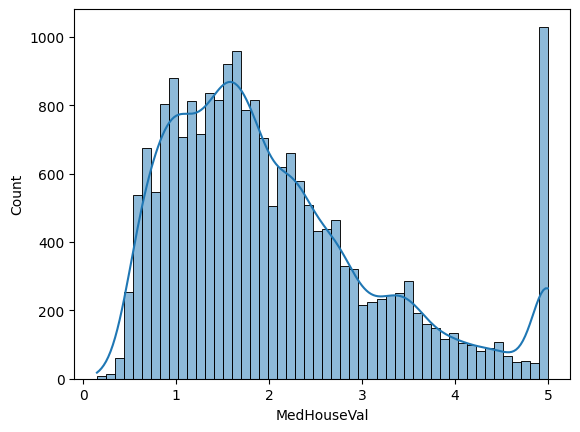

In [ ]:
sns.histplot(df['MedHouseVal'], bins=50, kde=True)


In [ ]:
# Split into features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (16512, 8)
Test shape: (4128, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data, then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("📏 Model Evaluation:")
print(f"MAE  = {mae:.3f}")
print(f"MSE  = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"R²   = {r2:.3f}")


📏 Model Evaluation:
MAE  = 0.533
MSE  = 0.556
RMSE = 0.746
R²   = 0.576


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test_scaled)


In [ ]:
# Same metrics as before
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("🌳 Decision Tree Evaluation:")
print(f"MAE  = {mae_tree:.3f}")
print(f"MSE  = {mse_tree:.3f}")
print(f"RMSE = {rmse_tree:.3f}")
print(f"R²   = {r2_tree:.3f}")


🌳 Decision Tree Evaluation:
MAE  = 0.454
MSE  = 0.494
RMSE = 0.703
R²   = 0.623


In [ ]:
# Control the depth of the tree to reduce overfitting
tree_model_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model_limited.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_limited = tree_model_limited.predict(X_test_scaled)

r2_limited = r2_score(y_test, y_pred_limited)
print(f"R² with max_depth=5: {r2_limited:.3f}")


R² with max_depth=5: 0.600


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Evaluation:")
print(f"MAE  = {mae_rf:.3f}")
print(f"MSE  = {mse_rf:.3f}")
print(f"RMSE = {rmse_rf:.3f}")
print(f"R²   = {r2_rf:.3f}")


🌲 Random Forest Evaluation:
MAE  = 0.327
MSE  = 0.255
RMSE = 0.505
R²   = 0.805


/tmp/ipython-input-21-502735424.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


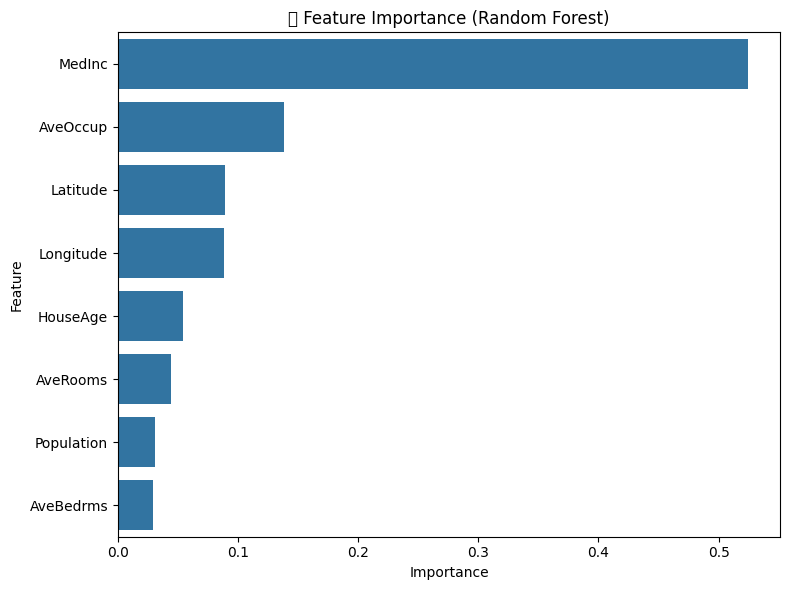

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title("📊 Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load data
california = fetch_california_housing(as_frame=True)
df = california.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333

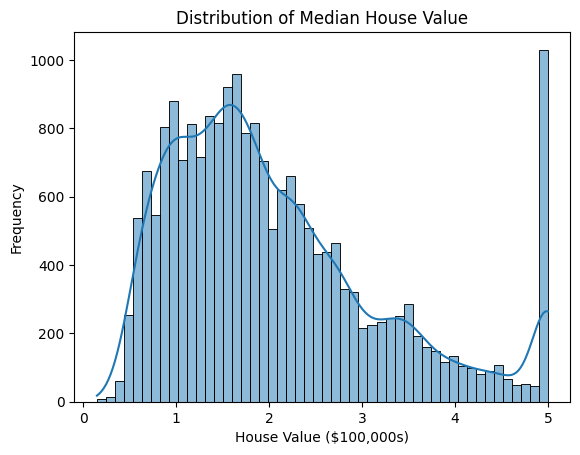

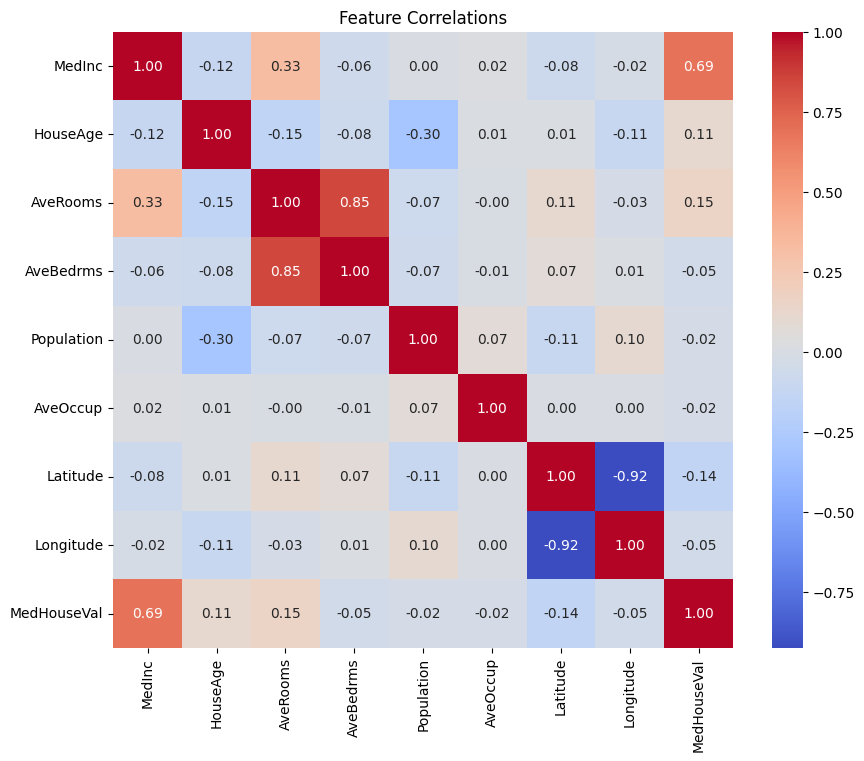

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print(df.shape)
print(df.info())
print(df.describe())

# Target distribution
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value ($100,000s)")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression R²: {r2:.3f}")


Linear Regression R²: 0.576


In [26]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

print(f"Decision Tree R²: {r2_score(y_test, y_pred_tree):.3f}")


Decision Tree R²: 0.623


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print(f"Random Forest R²: {r2_score(y_test, y_pred_rf):.3f}")


Random Forest R²: 0.805


In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf_base = RandomForestRegressor(random_state=42)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_base,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Fit to training data
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_rf.predict(X_test_scaled)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\n✅ Tuned Random Forest Performance:")
print(f"R²:   {r2_best:.3f}")
print


Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ Tuned Random Forest Performance:
R²:   0.805


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [29]:
print("Best hyperparameters found:")
print(grid_search.best_params_)


Best hyperparameters found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
{
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100
}


{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

# 🏠 California Housing Price Prediction

**Goal:** Build and compare machine learning models to predict median house values in California, using census data from `sklearn.datasets`.

This project covers the full data science pipeline: loading, EDA, preprocessing, regression modeling, evaluation, feature importance, and hyperparameter tuning.



In [32]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load data
california = fetch_california_housing(as_frame=True)
df = california.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333

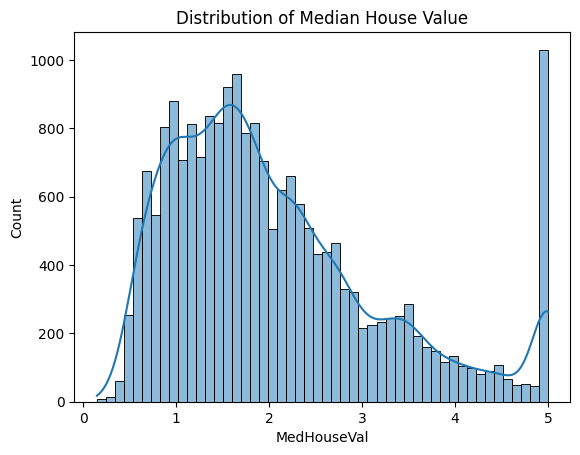

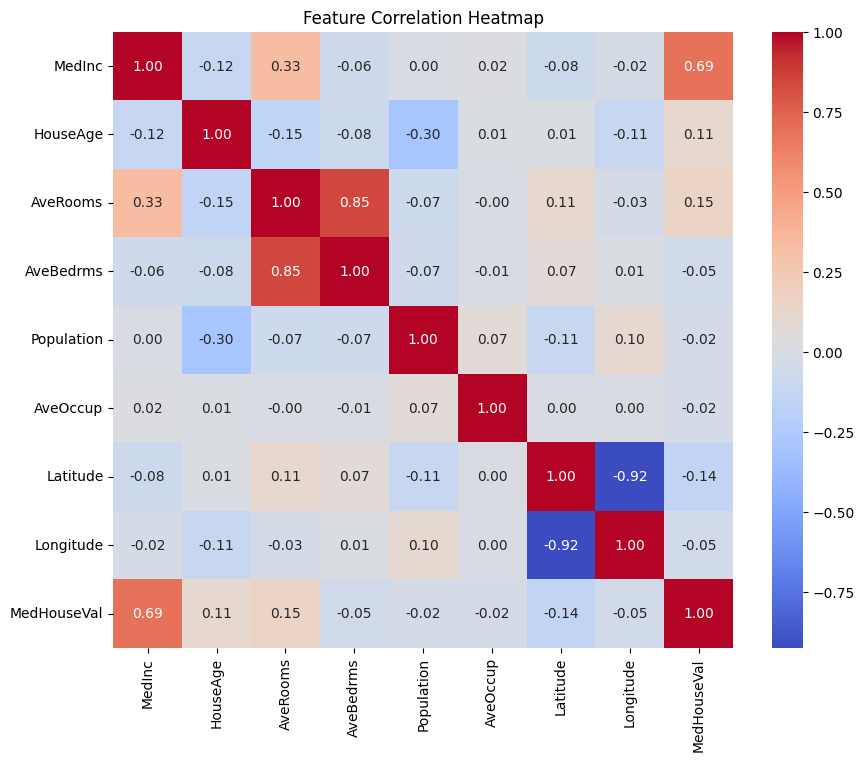

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print(df.shape)
print(df.info())
print(df.describe())

# Target distribution
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, name):
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Evaluation:")
    print(f"MAE:  {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²:   {r2:.3f}\n")
    return r2

# Linear Regression
lr = LinearRegression().fit(X_train_scaled, y_train)
evaluate(lr, "Linear Regression")

# Decision Tree
tree = DecisionTreeRegressor(random_state=42).fit(X_train_scaled, y_train)
evaluate(tree, "Decision Tree")

# Random Forest (default)
rf = RandomForestRegressor(random_state=42).fit(X_train_scaled, y_train)
evaluate(rf, "Random Forest")


Linear Regression Evaluation:
MAE:  0.533
RMSE: 0.746
R²:   0.576

Decision Tree Evaluation:
MAE:  0.454
RMSE: 0.703
R²:   0.623

Random Forest Evaluation:
MAE:  0.327
RMSE: 0.505
R²:   0.805



0.8052747336256919

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
evaluate(best_rf, "Tuned Random Forest")

print("Best hyperparameters found:")
print(grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuned Random Forest Evaluation:
MAE:  0.328
RMSE: 0.506
R²:   0.805

Best hyperparameters found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


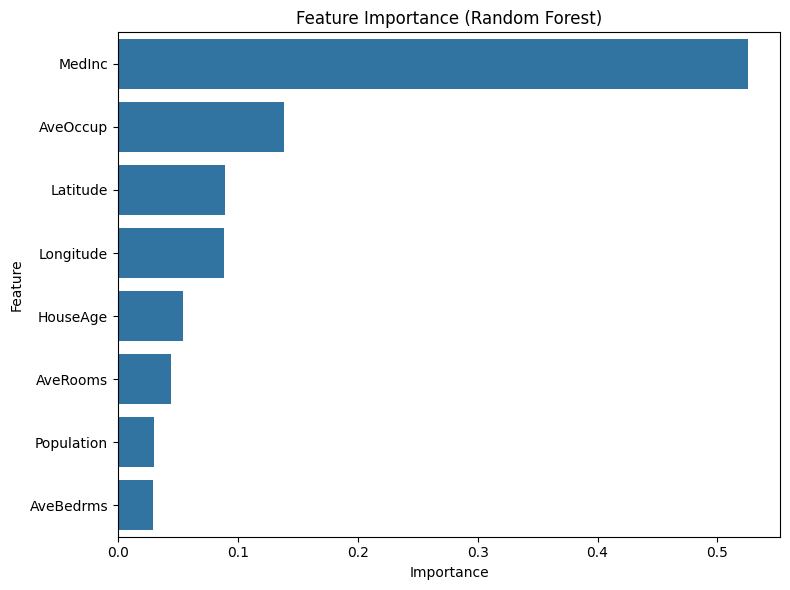

In [37]:
importances = best_rf.feature_importances_
feat_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


## 📘 Project Summary

- Trained 3 regression models to predict California house values: Linear Regression, Decision Tree, and Random Forest.
- Random Forest achieved the best results: **R² = 0.805**, MAE = $32,700, RMSE = $50,500.
- Hyperparameter tuning confirmed that `max_depth=20` and `n_estimators=100` work best.
- **Most important feature**: `MedInc` (Median Income), followed by `AveOccup` and geolocation (`Latitude`, `Longitude`).
- Demonstrated the full machine learning pipeline from data loading to feature importance.

### ✅ Skills Demonstrated:
- Exploratory Data Analysis (EDA)
- Preprocessing (scaling, train-test split)
- Regression modeling and evaluation
- Hyperparameter tuning with GridSearchCV
- Feature importance interpretation

### 📈 Next Steps:
- Try XGBoost or LightGBM for further improvement
- Engineer new features like `rooms_per_person`
- Build a Streamlit app or blog post to share results

